# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

## Цель работы


Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения

#### Бинарный метод возведения числа в степень
Бинарное возведение в степень — это приём, позволяющий возводить любое число в $n$-ую степень. В этом методе степень $n$ переводится в двоичную систему выкидывая старший бит. После чего полученный набор нулей и единиц превращаем в команды. Если бит равен единице, тогда текущее число возводится в квадрат и умножается на исходное число, если же бит равен нулю, тогда текущее число возводится в квадрат.
Оценку по количеству операций можно произвести следующим образом. $\lambda(n) + \nu(n)-1$, $\nu(n)$ - количество единиц в двоичной записи. $\lambda(n)$ - $\log_2 n$

#### Метод множителей возведения числа в степень 

Метод множителей - один из методов быстрого возведения числа в степень $n \in \mathbb{N}$. Если число простое, то возводим число в степень $k - 1$, а затем домножаем на исходное. Если же число  составное, тогда n представляется как произведение двух чисел $n = i \cdot j$, где i - наименьший простой множитель числа $n$. Сначала число возводится в степень i, затем результат возводится в степень j. В результате получится необходимое возведение в степень n. Если число n - простое, то на множители i и j раскладывается число n-1, число возводится в эту степень и домножается само на себя, чтобы получилось возведение в степень n.

#### Аддитивная цепочка.
Аддитивной цепочкой для числа n $\in \mathbb{N}$ называется последовательность чисел $1 = a_1, a_2, a_3, ..., a_m = n$, где $ a_i =  a_j +  a_k, k \leqslant j \lt i, i = 1..m$.

$l(n)$ - минимальная длина аддитивной цепочки.

Для формулы длины аддитивной цепочки существует рекуррентная формула $l(n) = min\{l(n - 1) + 1, \ l_n\} + \sigma_n $,
$$l_ p = \begin{cases} \infty, \ если \ p \ - \ простое \\ l(q)+l(\frac{p}{q}), \ если \ q - минимальный \ простой \ делитель \ p \end{cases}$$, где $ \sigma_n = \{0, 1\}$

#### Теорема Баруера
Для некторого $k \lt log_2 log_2 n$ справедливо неравенство: $l(n) \lt (1+k^{-1})\cdot\lceil\log_2 n\rceil+2^{k-1}-k+2$

При $k = \lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$:

$\cdot$ $\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)} = 1$

$\cdot$ Наилучшая верхняя оценка: $\lambda(n)(1+\cfrac{1}{\lambda(\lambda(n))}+\cfrac{o(\lambda(\lambda(\lambda(n))))}{(\lambda(\lambda(n)))^2})$


#### Алгоритм Брауэра для вычисления приближённых аддитивных цепочек
Данный алгоритм вычисляет ${a^n}$ за ${lb(n) + \frac{(1 + \mathcal{O}(1)) * lb(n)}{lb(lb(n))}}$ операций.

Алгоритм Брауэра позволяет построить аддитивную цепочку для заданного числа $n \in \mathbb{N}$ с учётом параметра $k \ge 2,\ k \in \mathbb{N}$, заданную следующим образом:

${B_k(n) = \begin{cases}
1, 2, 3, ..., 2^k - 1 : \text{ if } n \lt 2^k \\ 
B_k(q), 2q, 4q, ..., 2^k q, n : \text{ if } n \geq 2^k, q = \left \lfloor \frac {n}{2^k} \right \rfloor
\end{cases}}$

Иными словами, мы представляем ${n}$ в следующем виде:

${n = \sum_{i=0}^{j} a_i  2^{ik}, a_j \ne 0}$

Длина соответствующей цепочки равняется:

${l_B(n) = j(k+1) + 2^k - 2, jk \leq lbn \lt (j+1)k}$ для ${k \sim lb(lb(n)) - 2lb(lb(lb(n)))}$

Сразу заметим возможные оптимизации:

В случае ${n \lt 2^k}$ достаточно цепочки ${\left\{ 1, 2, 3, ..., b\right\}}$, где ${b = \max\left\{q_s, r_i\right\}}$ ${i = \overline{1..s}}$.
Можно опускать операции, в которых ${r_i = 0}$.

#### Алгоритм дробления вектора индексов
Звёздная аддитивная цепочка - цепочка, элементы в которой стрятся по следующему правилу: $a_i = a_{i-1} + a_j$, где $1\leqslant j \leqslant i$.

Алгоритм дробления вектора индексов: для заданного числа $n$ находит минимальную звёздную аддитивную цепочку.

Пусть $\exists$ звездная цепочка длины $m-1$ вида $\{a_i\}_1^m, a_1=1$

Тогда вектором индексов звёздной цепочки называется набор чисел $\{r_i \in \mathbb{N}\}_{i=1}^{m-1}$ : $r_i = \{x:1 \le x \le iy\ \Rightarrow\ a_i = a_{i-1} + a_{r_{i-1}},\ 2 \le i \le m-1\}$

Суть алгоритма дробления векторов индекса заключается в следующем: вычисляется диапазон, в котором может лежать значение длины звёздной цепочки $m$: $\underline l(n) \le m \le \bar l(n)$. Затем перебираются значения в этом диапазоне, для каждого $m$ фиксируется значение $q = [m/2]$, и набор $\{r_i\}_{i=1}^q$ называется фиксированной частью вектора. Далее вычисляются значения $a_{max}$ и $a_{min}$ - последние числа соответствующих ЗЦ:

$\{r_i\}_{i=1}^q \cup \{q+1, q+2, \ldots, m\}$ - вектор индекса максимальной цепочки

$\{r_i\}_{i=1}^q \cup \{1, 1, \ldots, 1\}$ - вектор индекса минимальной цепочки, в котором в подвижной части вектора $m-q$ единиц.

Если не выполняется условие $a_{min} \le n \le a_{max}$, фиксированная часть вектора понижается, а значения вычисляются заново.

#### Гипотеза Шольца - Брауэра

$l ^ * (2 ^  n- 1) \leq l ^ * (n) + n - 1$

## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы

1.    Применить бинарный метод и метод множителей для xn, где n⩾30, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.

2.    Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.

3.   Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при n>500. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.

4.   Проверить следствие 1 теоремы Брауэра для n=1..200 путём построения функции l(n) и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.

5.   Проверить гипотезу Шольца–Брауэра для 1<n⩽10 на алгоритме дробления вектора индексов. Сделать выводы.

6.   Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Выполнение работы

### Бинарный метод и метод множителей 

In [10]:
from prettytable import PrettyTable

def to_din(num):
    binary_num = ''
    while num > 0:
        binary_num = str(num % 2) + binary_num
        num = num // 2
    return binary_num


def minimum_prime_factor(num):
    a = num
    s = 2
    while s ** 2 <= a and a % s != 0:
        s += 1
    if a % s != 0:
        s = a
    return s


def binary_method(x, pow):
    binary = to_din(pow)
    count = 0
    result = x
    for i in range(1, len(binary)):
        if binary[i] == '1':
            result *= result
            result *= x
            count += 2
        else:
            result *= result
            count += 1

    return [result, count]


def multiplier_method(x, pow):
    min_prime_pow = minimum_prime_factor(pow)

    if min_prime_pow == pow:
        pow -= 1
        new_min_prime = minimum_prime_factor(pow)
        result = binary_method(x, pow)
        result2 = binary_method(result[0], pow % new_min_prime)

        result2[1] += result[1]
        result2[0] *= x

    else:
        result = binary_method(x, min_prime_pow)
        result2 = binary_method(result[0], int(pow / min_prime_pow))

        result2[1] += result[1]

    return result2

def printTable():
    th = ['x', 'n', "Binary", "Multiplier", "x^n"]
    colums = len(th)
    table = PrettyTable(th)
    x = 1
    for i in (21, 37, 69, 80, 99, 119, 421):
        answ_binary = binary_method(x, i)
        answ_multi = multiplier_method(x, i)
        td = [x, i, answ_binary[1], answ_multi[1], answ_multi[0]]
        table.add_row(td[:colums])
        td = td[colums:]
    print(table)
    
printTable()

+---+-----+--------+------------+-----+
| x |  n  | Binary | Multiplier | x^n |
+---+-----+--------+------------+-----+
| 1 |  21 |   6    |     6      |  1  |
| 1 |  37 |   7    |     6      |  1  |
| 1 |  69 |   8    |     9      |  1  |
| 1 |  80 |   7    |     7      |  1  |
| 1 |  99 |   9    |     8      |  1  |
| 1 | 119 |   11   |     9      |  1  |
| 1 | 421 |   12   |     11     |  1  |
+---+-----+--------+------------+-----+


Из таблички можно увидеть что бинарный метод совсем немного уступает методу множителей по количеству операций, а иногда и привосходит его. Бинарный метод хуже при степенях $2^n-1$, но при степенях $2^n+1$ он работает лучше чем метод множителей. Это происходит из-за самого определения методов, когда надо получить степень $2^n+1$ надо $n$ раз возвести число в квадрат, а потом еще сверху домножить на исходное.

### Алгоритм Брауэра

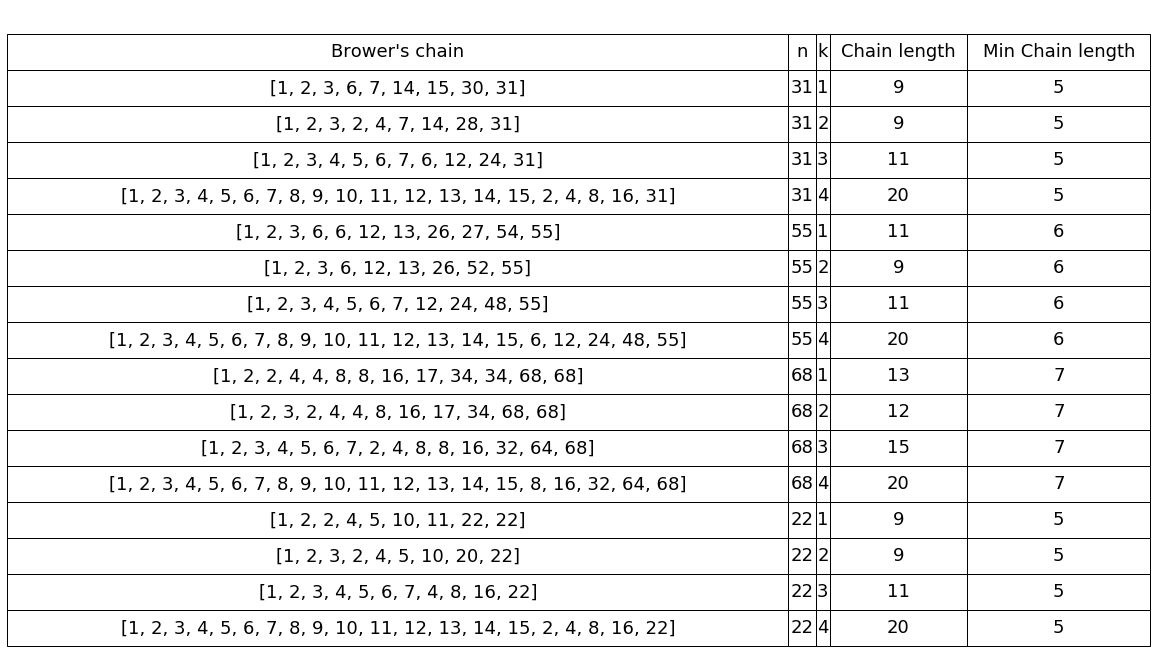

In [6]:
import math
import matplotlib.pyplot as plt

def minLenCh(n):
    return int(math.log(n, 2)) + 1

def brouwerMeth(chain, n, k):
    if(n < 2**k):
        for i in range(1, 2**k):
            chain.append(i)
    else:
        q = n//(2**k)
        chain = brouwerMeth(chain, q, k)
        for i in range(1, k+1):
            q = q*2
            chain.append(q)
        chain.append(n)
    return chain


def printTable():
    fig, ax = plt.subplots()
    ax.set_axis_off()
    fig.set_figheight(0.5)
    fig.set_figwidth(7.0)
    colText = []
    
    for i in (31, 55, 68, 22):
        for j in (1, 2, 3, 4):
            additive_chain = []
            additive_chain = brouwerMeth(additive_chain, i, j)
            colText.append([ additive_chain, i, j, len(additive_chain), minLenCh(i)])

    #collabel = ('n', 'k', "len chain", "additive_chain")
    table = plt.table(colText, colLabels=["Brower's chain","n", "k", "Chain length","Min Chain length"], \
              cellLoc="center", edges="closed")

    table.scale(10, 3)
    table.set_fontsize(18)
    table.auto_set_column_width([1, 2, 3, 4])
    plt.show()

printTable()

Алгоритм идеально подходит для быстрого поиска аддитивной цепочки. Он находит не минимальную, но вполне удовлетворительную длину за то время что он ее строит.
### Алгоритм дробления вектора индексов

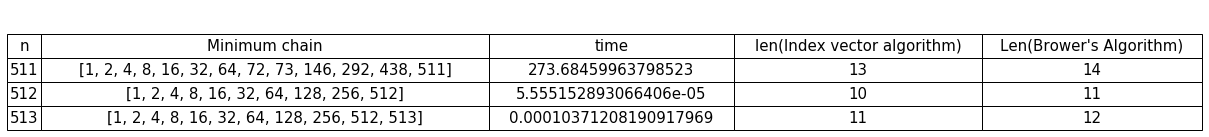

In [19]:
from time import time
import math
import matplotlib.pyplot as plt

def buildChain(indVec):
    starCh = [1]
    for i in indVec:
        starCh.append(starCh[-1] + starCh[i[-1]])
    return starCh

def la(n):
    return int(math.log(n, 2)) + 1

def nu(n):
    nStr = bin(n)[2::]
    return int(math.log(n, 2)) + nStr.count('1')


def AlgVect(n):
    chain = []
    for m in range(la(n), nu(n) + 1):
        q = m // 2
        indVec = [[j for j in range(i+1)] for i in range(m-1)]
        if n > buildChain(indVec)[-1]:
            continue
        while True:
            indVec = indVec[:q:] + [[j for j in range(i + 1)] for i in range(q, m - 1)]
            maxChain = buildChain(indVec)
            minChain = buildChain(indVec[:q:] + [[0]] * (m - q - 1))
            if n == maxChain[-1]:
                return maxChain
            elif n == minChain[-1]:
                return minChain
            p = m - 2
            while True:
                while indVec[p][-1] == 0:
                    indVec[p] = indVec[p][-1::] + indVec[p][:-1:]
                    p -= 1
                    if p < q:
                        break
                if p < q:
                    break
                indVec[p] = indVec[p][-1::] + indVec[p][:-1:]
                p = m - 2
                chain = buildChain(indVec)
                if chain[-1] == n:
                    return chain
            subQ = q - 1
            while indVec[subQ][-1] == 0:
                indVec[subQ] = indVec[subQ][-1::] + indVec[subQ][:-1:]
                subQ -= 1
            if subQ < 0:
                break
            indVec[subQ] = indVec[subQ][-1::] + indVec[subQ][:-1:]
    return chain

def brouwer(chain, n, k):
    d = 2**k
    q = int(n/d)
    r = n%d
    if(n >= d):
        brouwerMeth(chain, q, k)
    else:
        for i in range(1, d):
            chain.append(i)
        return
    for i in range(1, k+1):
        if (2**i)*q not in chain:
            chain.append((2**i)*q)
    if (2**k)*q + r not in chain:
        chain.append((2**k)*q + r)

def printTable():
    fig, ax = plt.subplots()
    ax.set_axis_off()
    fig.set_figheight(0.5)
    fig.set_figwidth(7.0)
    colText = []
    for i in (511,512,513):
        start = time()
        chainDiv = AlgVect(i)
        end = time()
        chain = []
        brouwer(chain, i, 2)
        colText.append([i, chainDiv, round(end - start,3), len(chainDiv), len(chain)])
    table = plt.table(colText, colLabels = ["n", "Minimum chain", "time", "len(Index vector algorithm)", "Len(Brower's Algorithm)"],\
                  cellLoc = "center", edges = "closed")
    table.scale(3,2)
    table.set_fontsize(15)
    table.auto_set_column_width([0,1,2,3,4])
    plt.show()

printTable()

Как можно заметить алгоритм очень быстро справляется со степенью двойки и чем дальше от нее тем дольше работает алгоритм. По сравнению с Брауэром, который быстро вычисляет адитивную цепочку не минимальной длины, алгоритм векторов индексов вычисляет ее довольно долго за счет простого перебора, но зато вычисляет минимально возможную цепочку.


### Проверка следствия 1 теоремы Брауэра

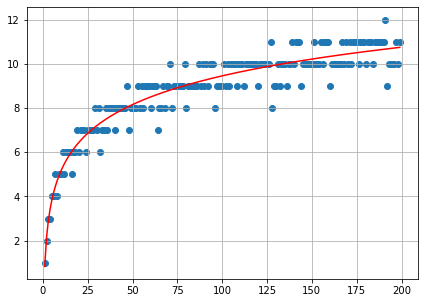

In [36]:
import numpy

def PrintGraph(num):
    n = [i for i in range(1, num)]
    length = [len(AlgVect(i)) for i in range(1, num)]

    plt.figure(figsize=(7, 5))
    plt.scatter(n, length)

    m = matrix([[sum([float((log(i) ** 2)) for i in n]), sum([float(log(i)) for i in n])],
                [sum([float(log(i)) for i in n]), len(n)]])
    vec = vector([sum([float(length[i] * log(n[i])) for i in range(len(n))]), sum(length)])
    a = m.solve_right(vec)


    plt.plot(n, [log(i)*a[0] + a[1] for i in n], color='r')
    plt.grid(True)
    plt.show()

PrintGraph(200)

Из графика видно, что аппроксимируюшая кривая напоминает функцию логарифма. То есть длина звездной цепочки имеет логарифмическую зависимость от исходного числа. 

### Проверка гипотезы Шольца-Брауэр

In [69]:
print("  Deg  |Scholz-Brauer conject.| Result |Time ")
print("_______|______________________|________|_____")
for n in range(2,11):
    start = time()
    starChain_1 = AlgVect(2**n-1)
    end = time()
    starChain_2 = AlgVect(n)
    print(f"n = {n} {'' if n > 9 else ' '}| l*(2^{n}-1) ⩽ l*({n})+{n}-1| {len(starChain_1)} ⩽ {len(starChain_2)+n-1}{'  ' if len(starChain_1) <= 9 else ''}| {round(end-start, 3)}")
    

  Deg  |Scholz-Brauer conject.| Result |Time 
_______|______________________|________|_____
n = 2  | l*(2^2-1) ⩽ l*(2)+2-1| 3 ⩽ 3  | 0.0
n = 3  | l*(2^3-1) ⩽ l*(3)+3-1| 5 ⩽ 5  | 0.0
n = 4  | l*(2^4-1) ⩽ l*(4)+4-1| 6 ⩽ 6  | 0.0
n = 5  | l*(2^5-1) ⩽ l*(5)+5-1| 8 ⩽ 8  | 0.006
n = 6  | l*(2^6-1) ⩽ l*(6)+6-1| 9 ⩽ 9  | 0.038
n = 7  | l*(2^7-1) ⩽ l*(7)+7-1| 11 ⩽ 11| 2.338
n = 8  | l*(2^8-1) ⩽ l*(8)+8-1| 11 ⩽ 11| 2.915
n = 9  | l*(2^9-1) ⩽ l*(9)+9-1| 13 ⩽ 13| 275.033
n = 10 | l*(2^10-1) ⩽ l*(10)+10-1| 14 ⩽ 14| 3394.066


Как можно увидеть из таблицы, для  $1 \lt n \leq 10$, гипотеза Шольца-Брауэра работает, это доказывает ее жизнеспособность. Для вычисления минимальной цепочки $n=2^k-1$ уходиточень много ресурсов особенно если  $n \geq 10$ вычисление продолжается больше часа, нахождение длины с помощью формулы $l^*(k)+k-1$ происходит на много быстрее.

## Выводы по практической работе
В ходе выполнения работы было реализовано несколько методов нахождения аддитивных цепочек, несколько методов для нахождения $x^n$ для  $n \in N$. В процессе тестированя были изучены эти методы и выявлены их плюсы и недостатки, поняли для каких целей использовать тот или иной алгоритм.Приобрели навыки в работе с новыми инструментами.
